<a href="https://colab.research.google.com/github/fabsy381/mvp/blob/main/mvp_teste1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#natural language toolkit, usada pra construir programas que trabalham com dados
#de linguagem natural (humana)
import nltk
nltk.download('stopwords')
#módulo para trabalhar com stopwords, que são palavras que podem ser filtradas
#do texto, como "the", "is", "are"
from nltk.corpus import stopwords
#funções que trabalham com operações envolvendo cadeias de palavras
import string
#biblioteca de alta performance contendo estruturas de dados e ferramentas de
#análise de dados
import pandas as pd

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1]:
#scikit-learn: bibliotecas com funções para aprendizado de máquina no python
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
def processaTexto(texto):
    #remove pontuação caractere a caractere
    nopunc = [char for char in texto if char not in string.punctuation]
    #junta os caracteres em palavras novamente
    nopunc = ''.join(nopunc)
    #nopunc.split() separa cada frase em palavras, retirando as que estão dentro de stopwords
    #word.lower() torna todas as letras minúsculas
    #essa linha remove as stopwords, retornando apenas as palavras relevantes para a análise
    cleanWords = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return cleanWords

In [4]:
#nltk.download()


In [7]:
#Carrega a base de dados spam.csv
messages = pd.read_csv('/spam.csv', encoding='latin-1')

In [ ]:
#renomeia colunas
messages = messages.rename(columns={'v1': 'tipo','v2': 'mensagem'})

In [ ]:
#imprime base de dados
#mensagem não spam é clasificada como ham
#mensagem spam é clasificada como spam
print(messages.to_string())


      tipo                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        mensagem                                                                              

In [ ]:
#gera estatísticas descritivas sobre o dataset analisado
#exibe count (total de mensagens ham), quantas são únicas (ou seja, tem valores repetidos)
#top (a mensagem que mais se repete) e freq (quantas vezes a mensagem top repete)
#aproximadamente 13,4% é spam e temos muitas mensagens duplicadas
print(messages.groupby('tipo').describe().iloc[0])
print(messages.groupby('tipo').describe().iloc[1])

mensagem    count                                                  4825
            unique                                                 4516
            top                                  Sorry, I'll call later
            freq                                                     30
Unnamed: 2  count                                                    45
            unique                                                   39
            top        bt not his girlfrnd... G o o d n i g h t . . .@"
            freq                                                      3
Unnamed: 3  count                                                    10
            unique                                                    9
            top                                                      GE
            freq                                                      2
Unnamed: 4  count                                                     6
            unique                                              

In [ ]:
#aplica a função len em cada mensagem de texto analisada
messages['length'] = messages['mensagem'].apply(len)

In [ ]:
#imprime a coluna nova que foi criada no dataframe, mostrando o tamanho de cada mensagem de texto
print(messages.iloc[:,2])

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
5567    NaN
5568    NaN
5569    NaN
5570    NaN
5571    NaN
Name: Unnamed: 2, Length: 5572, dtype: object


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

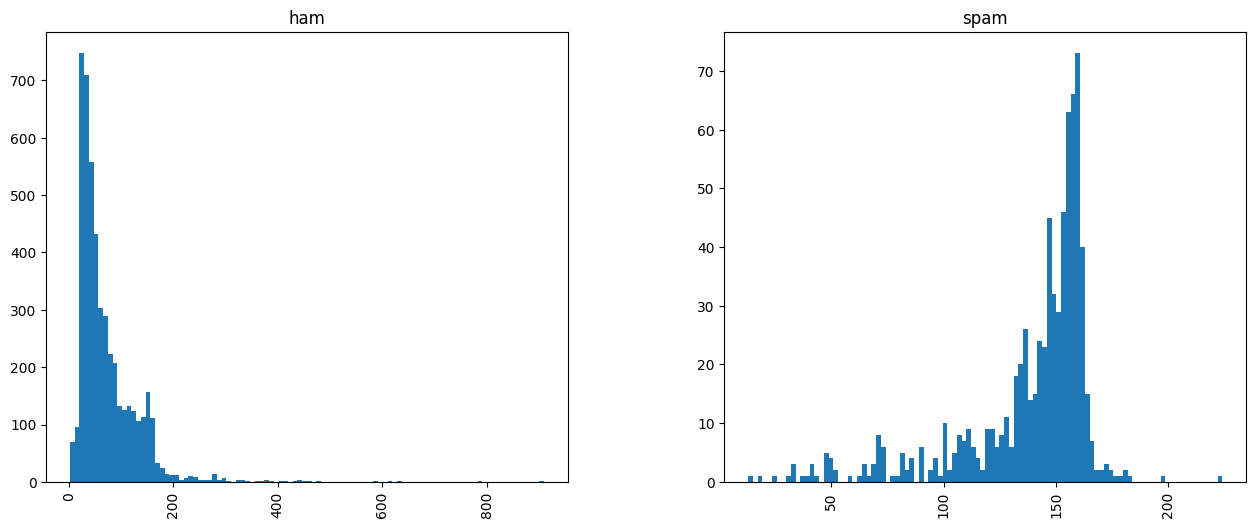

In [ ]:
#desenha um gráfico do número de mensagens pelo tamanho
#podemos ver pela figura que as mensagens não spam (ham) possuem mensagens com menos de
#200 caracteres (em média 100 para ser preciso), já as mensagens SPAM tendem a ser
#maiores do que 100, oscilando entre 130 e 140
messages.hist(column='length',by='tipo',bins=100, figsize=(15,6))

In [ ]:
print(messages.iloc[:,1].head())

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: mensagem, dtype: object


In [ ]:
#mostrar as stopwords (palavras muito comuns que motores de busca tendem a ignorar.
#elas tomam espaço na base de dados ou tempo precioso de processamento)
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
print(messages.iloc[:,1].head())

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: mensagem, dtype: object


In [ ]:
#divide os conjuntos em treinamento e teste
#msg_train e msg_test são os conjuntos de treinamento e teste da base de dados de mensagens
#class_train e class_test são, respectivamente, os rótulos dos sets de teste e treinamento
#por parâmetro são passados os conjuntos de mensagens e o conjunto de rótulos (tipo), bem como o tamanho da base de teste
msg_train, msg_test, class_train, class_test = train_test_split(messages['mensagem'], messages['tipo'], test_size=0.2)

In [ ]:
#pipeline de transformação com estimador. sequencialmente aplica uma lista de transformações
#a primeira converte documentos de texto em uma matriz com contagem de tokens, ou seja, conta a ocorrência de cada palavra no vocabulário
#a segunda normaliza a contagem (term frequency times inverse document frequency)
#este escala para baixo o impacto de tokens que ocorrem frequentemente e que sejam
#empiricamente menos informativos do que features que ocorrem em uma pequena fração do treinamento
#a última linha treina esses vetores no classificador naive bayes
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=processaTexto)), # converts strings to integer counts
    ('tfidf',TfidfTransformer()), # converts integer counts to weighted TF-IDF scores
    ('classifier',MultinomialNB()) # train on TF-IDF vectors with Naive Bayes classifier
])

In [ ]:
#testa um exemplo
msg_test.iloc[0] = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [ ]:
#treina o modelo
pipeline.fit(msg_train,class_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function processaTexto at 0x7deb919af7f0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [ ]:
#testa o modelo
predictions = pipeline.predict(msg_test)

In [ ]:
#resultado do teste de exemplo acima
print(predictions[0])

spam


In [ ]:
#mostra os resultados
print(classification_report(class_test,predictions))

NameError: name 'classification_report' is not defined